In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [105]:
df = pd.read_csv('part 1. data.csv')

In [106]:
df.describe()

,Unnamed: 0,Stock Price,P/E Ratio,Dividend Yield,Market Cap,Stock Return
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,113.385227,26.067968,2.551256,16.806860,14.268267
std,29.011492,41.055494,7.111987,0.408450,6.741729,15.977771
min,1.000000,50.433363,15.011109,1.862989,5.260151,-18.456735
25%,25.750000,73.084379,19.895687,2.165840,10.789972,0.908863
50%,50.500000,115.278888,25.490583,2.536920,17.113839,13.708463
75%,75.250000,153.381344,31.071771,2.928450,21.190868,26.254191
max,100.000000,174.550937,39.985559,3.189162,29.715092,58.183619


In [107]:
df[['Stock Price', 'P/E Ratio', 'Dividend Yield', 'Market Cap', 'Stock Return']].head()

,Stock Price,P/E Ratio,Dividend Yield,Market Cap,Stock Return
0,79.381258,15.048296,1.870956,10.495274,13.537425
1,107.248490,29.487398,1.871060,13.025350,0.266531
2,59.508983,29.748371,2.052769,27.192751,48.338263
3,56.892746,17.995553,2.666637,15.837167,19.535499
4,158.197056,21.661047,2.879441,21.222265,-1.425241


# 1.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


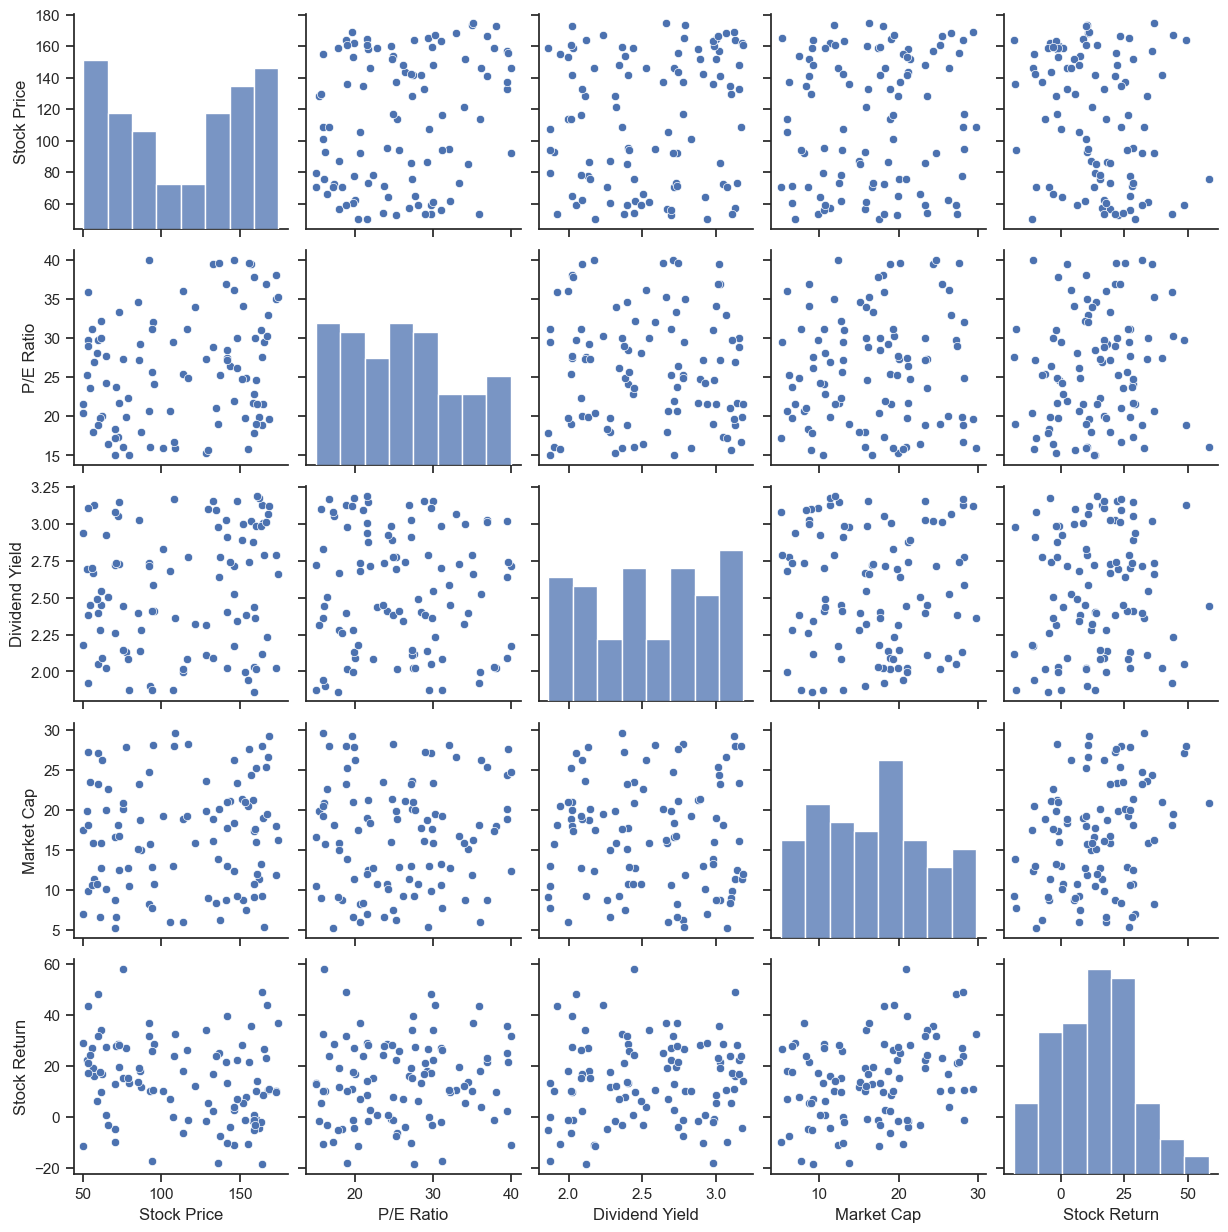

In [108]:
sns.set_theme(style="ticks")
sns.pairplot(df[['Stock Price', 'P/E Ratio', 'Dividend Yield', 'Market Cap', 'Stock Return']])

# 2.

### The F-test:
     H0 : All the coefficients are zero
     H1 : At least one is not zero

# 3.

In [109]:
y = df['Stock Return']
x = df[['P/E Ratio', 'Dividend Yield', 'Market Cap', 'Stock Price']]

In [110]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [111]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock Return   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     6.074
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000214
Time:                        21:05:46   Log-Likelihood:                -407.12
No. Observations:                 100   AIC:                             824.2
Df Residuals:                      95   BIC:                             837.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.5254     11.586     -0.

# 4.

### The equation will look like: 
    Stock Return = - 8.5254 + 0.3925 * P/E Ratio + 5.8888 * Divinend Yield + 0.7378 * Market Cap - 0.1311 * Stock Price
    
    

# 5.

In [112]:
#We have already the results and statistics, 
#but for example i will show the calculations
Rsq = 0.204
N = 100
k = 5

ftest = (Rsq/(1 - Rsq))*(N - k)/(k - 1)
print('f-stat is ', ftest)

ttest1 = -8.5254 / 11.586
print('t-statistic for const is ', ttest1)

f-stat is  6.086683417085426
t-statistic for const is  -0.735836354220611


### In our model we can see 
    R-squared is 0.204
    
    F-statistic is 6.074 
    
    t-tests:
        for const is -0.736 ((coef-0)/std err), p-value = 0.464
        for P/E Ratio 1.846 and 0.068
        Dividend Yield 1.616 and 0.109
        Market Cap 3.384 and 0.001
        Stock Price -3.514 and 0.001

# 5-6.

### About interpretations

    Every unit in P/E Ratio increases stock return by 0.39 USD
    Every percentage point in dividend yield increases stock return by 5.88 USD
    Every billion of USD in market cap increases stock return by 0.7378 USD
    Every usd in stock price decreases stock return by 0.1311 USD
    
    We cannot interpret the constant because it is not significant

### About results...

    In general, we have done not the greatest model, because we have R-sq is only 0.204

    But the model is significant, F-test p-value is about zero, so we may to say about coefficients:
        p-value is low for each x except const, it has p-value 0.464 so it is not significant, but i can't say to drop it, because it will be worse (my opinion) and Dividend Yield, its p-value is 0.109 and also not significant.
## We can try to drop them:
    

In [121]:
x = df[['P/E Ratio', 'Market Cap', 'Stock Price']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock Return   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7.109
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000231
Time:                        21:09:20   Log-Likelihood:                -408.48
No. Observations:                 100   AIC:                             825.0
Df Residuals:                      96   BIC:                             835.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.3832      7.072      0.903      

## To drop Dividend Yield doesn't improve the model (AIC, BIC are higher, R-sq lower)

### What about const?

In [114]:
x = df[['P/E Ratio', 'Dividend Yield', 'Market Cap', 'Stock Price']]
model = sm.OLS(y, x).fit()
print(model.summary())
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns
vif

                                 OLS Regression Results                                
Dep. Variable:           Stock Return   R-squared (uncentered):                   0.556
Model:                            OLS   Adj. R-squared (uncentered):              0.538
Method:                 Least Squares   F-statistic:                              30.11
Date:                Fri, 17 Nov 2023   Prob (F-statistic):                    3.14e-16
Time:                        21:05:47   Log-Likelihood:                         -407.41
No. Observations:                 100   AIC:                                      822.8
Df Residuals:                      96   BIC:                                      833.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

,VIF,variable
0,12.417778,P/E Ratio
1,15.317978,Dividend Yield
2,6.627648,Market Cap
3,9.468086,Stock Price


### Here we see and high R-sq and our AIC and BIC lower (better) than past model, but it is not centered. 

    At least we can imagine the stock with Market Cap zero, so the stock price also will be zero
    
# BUT WE HAVE MULTICOLLINEARITY SO WE WON'T DROP THE CONST

# 7.

In [115]:
#using the first model 
x = df[['P/E Ratio', 'Dividend Yield', 'Market Cap', 'Stock Price']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns
print(vif)
print('\nThere is no multicollinearity (VIFs about 1)')

         VIF        variable
0  63.367114           const
1   1.068030       P/E Ratio
2   1.034649  Dividend Yield
3   1.009629      Market Cap
4   1.096021     Stock Price

There is no multicollinearity (VIFs about 1)


In [116]:
white_test = statsmodels.stats.diagnostic.het_white(model. resid , model. model.exog )

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'Test Statistic': 10.451285646208042, 'Test Statistic p-value': 0.7285013793564968, 'F-Statistic': 0.7086001707389321, 'F-Test p-value': 0.7600274518409535}


### We can say, that we have no multicollinearity and we have no heteroskedasticity (p-value is high)

# 8. 

# P.S. I don't know why the code below doesn't work

In [117]:
#dftest = pd.DataFrame({'P/E Ratio' : [45], 'Dividend Yield' : [1.2], 'Market Cap' : [35], 'Stock Price' : [200]})
#dftest =  sm.add_constant(dftest)
#print(dftest)
#results = model.predict(dftest)

In [118]:
StockPredict = - 8.5254 + 0.3925 * 45 + 5.8888 * 1.2 + 0.7378 * 35 - 0.1311 * 200
print(round(StockPredict,2), 'USD is my prediction')

15.81 USD is my prediction
